# Figure 1B scatterplot:
### All worm positions from chemotaxis assays with only reference conditions

In [1]:
# Importing the plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest

#### 1. Reading in the data to draw the plots

In [2]:
ref_df = pd.read_csv('D:/NP_manuscript/data/wormX_ref_comps.csv', index_col=0)

#### 2.  Rescaling the worm locations so that they are represented in millimeters instead of dpi

In [3]:
# 1 inch = 25.4mm
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm

#The following transforms the worm location data so that it is respective to the start zone
# The start zone is at the center of the image; Start Zone = 0mm
#Worms with positive values are closer to the compound, negative values are away from the compound
mm_df = ref_df.apply(lambda x: -(x/px_mm)+32.5)

In [4]:
mm_df = mm_df.rename(columns={'EMT': 'Empty', '1-Oct': '1-octanol', 'DI':'Diacetyl', 'IA':'Isoamyl alcohol', '2no':'2-nonanone'})

mm_df.head()

,Empty,1-octanol,Diacetyl,DMSO,Isoamyl alcohol,2-nonanone
0,-11.484333,-24.247833,-16.797167,7.078833,23.927500,-11.124500
1,-5.663500,-16.373833,-8.817333,2.739667,22.297667,1.850667
2,-4.330000,-7.378000,-17.813167,-14.913333,4.560000,3.840333
3,-10.320167,3.967333,-7.526167,15.397333,13.746333,17.958500
4,24.710667,4.369500,-12.733167,-24.099667,3.798000,9.682333


#### 3. Drawing the plot and setting plot aesthetics

In [5]:
# The compounds need to be passed as a list in the order of desired appearance to dabest
ref_comps= ['DMSO','Empty', 'Diacetyl', 'Isoamyl alcohol', '1-octanol', '2-nonanone']
# Creating a color map to be passed to the plotting function
color_dict={'DMSO':'#5e4fa2', 'Empty':'#5e4fa2','Diacetyl':'#66c2a5', 'Isoamyl alcohol':'#66c2a5',  '1-octanol':'#fdae61', '2-nonanone':'#fdae61'}

# You need to load the data into dabest in order to use their plotting function
# Simply pass the dataframe and the ordered list of compounds
mm_refs_obj = dabest.load(mm_df, idx=(ref_comps))

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


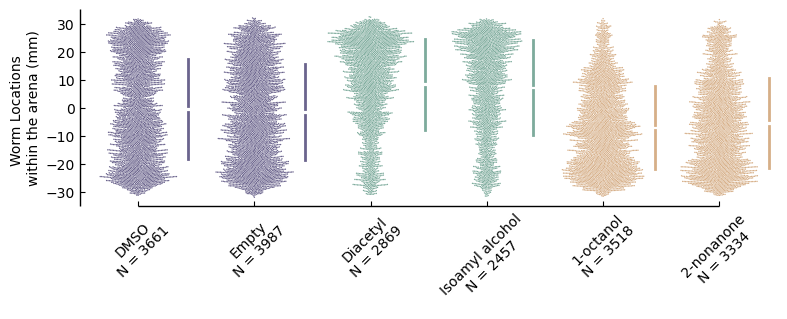

In [6]:
# Generating the plots
mm_refs_plot = mm_refs_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena (mm)', 
                                        contrast_label="Mean differene (mm)", contrast_ylim = (-20,20), swarm_ylim=(-35,35), custom_palette=color_dict)

#Accessing plot axes to control plot asthetics
rawswarm_axes = mm_refs_plot.axes[0]
contrast_axes = mm_refs_plot.axes[1]

rawswarm_axes.yaxis.set_tick_params(tickdir='in')
rawswarm_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
plt.rcParams['svg.fonttype'] = 'none'

contrast_axes.remove()



In [7]:
#Saving the figure
mm_refs_plot.savefig('D:/NP_manuscript/figs/1B_refComps_swarmplot.svg', dpi=300)

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
